In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [34]:
df = pd.read_csv('CAR DEKHO.csv')

In [35]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [36]:
df.keys()

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [37]:
df.shape

(4340, 8)

In [38]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [39]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [40]:
df.duplicated().sum()

763

In [41]:
df.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [42]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [43]:
df['transmission'].value_counts()

,count
transmission,
Manual,3892
Automatic,448


In [44]:
df['fuel'].value_counts()

,count
fuel,
Diesel,2153
Petrol,2123
CNG,40
LPG,23
Electric,1


In [45]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,3244
Dealer,994
Trustmark Dealer,102


In [46]:
df['owner'].value_counts()

,count
owner,
First Owner,2832
Second Owner,1106
Third Owner,304
Fourth & Above Owner,81
Test Drive Car,17


In [47]:
df['name'].value_counts()

,count
name,
Maruti Swift Dzire VDI,69
Maruti Alto 800 LXI,59
Maruti Alto LXi,47
Maruti Alto LX,35
Hyundai EON Era Plus,35
...,...
Hyundai Verna Transform CRDi VGT SX ABS,1
Maruti S-Presso VXI Plus,1
Toyota Etios Liva 1.2 VX,1


In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [49]:
df1=df

In [50]:
df1['transmission_label_encoded'] = label_encoder.fit_transform(df['transmission'])

In [51]:
df1['sellertype_label_encoded'] = label_encoder.fit_transform(df['seller_type'])

In [52]:
df1['fuel_label_encoded'] = label_encoder.fit_transform(df['fuel'])

In [53]:
df1['owner_label_encoded'] = label_encoder.fit_transform(df['owner'])

In [54]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,transmission_label_encoded,sellertype_label_encoded,fuel_label_encoded,owner_label_encoded
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,1,1,4,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1,1,4,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,1,1,4,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1,1,1,2


In [55]:
df1 = df1.drop ('fuel', axis = 1)
df1 = df1.drop ('seller_type', axis = 1)
df1 = df1.drop ('transmission', axis = 1)
df1 = df1.drop ('owner', axis = 1)
df1 = df1.drop ('name', axis = 1)
df1

,year,selling_price,km_driven,transmission_label_encoded,sellertype_label_encoded,fuel_label_encoded,owner_label_encoded
0,2007,60000,70000,1,1,4,0
1,2007,135000,50000,1,1,4,0
2,2012,600000,100000,1,1,1,0
3,2017,250000,46000,1,1,4,0
4,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,1,1,2
4336,2014,409999,80000,1,1,1,2
4337,2009,110000,83000,1,1,4,2
4338,2016,865000,90000,1,1,1,0


In [56]:
df1.corr()

,year,selling_price,km_driven,transmission_label_encoded,sellertype_label_encoded,fuel_label_encoded,owner_label_encoded
year,1.000000,0.413922,-0.419688,-0.143800,-0.098352,-0.120002,-0.414705
selling_price,0.413922,1.000000,-0.192289,-0.530205,-0.151554,-0.269653,-0.207840
km_driven,-0.419688,-0.192289,1.000000,0.120226,0.113689,-0.286095,0.297115
transmission_label_encoded,-0.143800,-0.530205,0.120226,1.000000,0.174925,0.039249,0.078893
sellertype_label_encoded,-0.098352,-0.151554,0.113689,0.174925,1.000000,0.038797,0.165681
fuel_label_encoded,-0.120002,-0.269653,-0.286095,0.039249,0.038797,1.000000,-0.010910
owner_label_encoded,-0.414705,-0.207840,0.297115,0.078893,0.165681,-0.010910,1.000000


<Axes: >

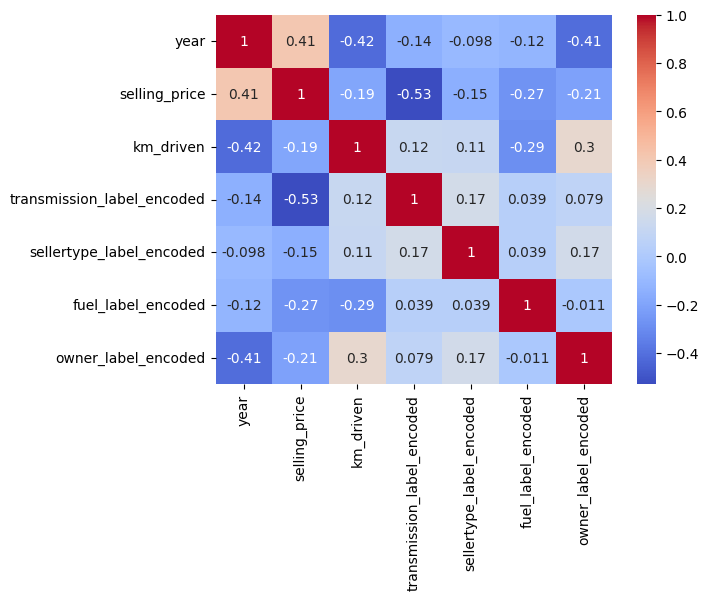

In [59]:
sns.heatmap(df1.corr(), annot=True,cmap='coolwarm')

In [64]:
x=df1.drop('selling_price',axis=1) #input
y=df1['selling_price'] #target variable

In [65]:
y

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
...,...
4335,409999
4336,409999
4337,110000
4338,865000


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_Test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [68]:
x_train.shape, x_Test.shape, y_train.shape,y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

In [69]:
x_train

,year,km_driven,transmission_label_encoded,sellertype_label_encoded,fuel_label_encoded,owner_label_encoded
929,2012,49824,1,0,4,0
3607,2016,95000,1,1,1,2
2117,2011,72000,1,0,1,4
2792,2017,17563,1,1,4,0
246,2018,25000,1,1,1,0
...,...,...,...,...,...,...
3444,2006,50000,1,1,1,0
466,2011,80000,1,1,1,0
3092,2016,51000,1,0,1,0
3772,2013,80000,1,1,1,0


In [70]:
from sklearn.linear_model import LinearRegression

#initialize the model
model=LinearRegression()

#train the model
model.fit(x_train,y_train)

LinearRegression()

In [71]:
model.coef_

array([ 3.71268352e+04, -1.07864919e+00, -9.03116636e+05, -2.06175259e+04,
       -9.75657317e+04, -1.39908617e+04])

In [72]:
model.intercept_

-73084874.56927244

In [73]:
y_pred=model.predict(x_Test)

In [74]:
y_pred

array([432472.44219367, 531085.1715968 ,  78827.30850872, ...,
       420044.57023425, 775416.2768455 , 204591.89606576])

In [75]:
y_pred.shape

(1302,)

In [78]:
df2=pd.DataFrame({'Actual': y_test,'Predicted':y_pred})

In [80]:
df2

,Actual,Predicted
3978,165000,4.324724e+05
1448,250000,5.310852e+05
2664,120000,7.882731e+04
17,450000,4.872005e+05
1634,730000,1.551941e+06
...,...,...
3790,1490000,7.548810e+05
700,650000,5.965336e+05
1370,165000,4.200446e+05
644,1600000,7.754163e+05


In [81]:
df2['Error']=abs(df2['Actual']-df2['Predicted'])

In [82]:
df2

,Actual,Predicted,Error
3978,165000,4.324724e+05,267472.442194
1448,250000,5.310852e+05,281085.171597
2664,120000,7.882731e+04,41172.691491
17,450000,4.872005e+05,37200.459008
1634,730000,1.551941e+06,821941.349738
...,...,...,...
3790,1490000,7.548810e+05,735119.046512
700,650000,5.965336e+05,53466.365469
1370,165000,4.200446e+05,255044.570234
644,1600000,7.754163e+05,824583.723155


In [83]:
df2['Error'].mean() #mean absolute error

222030.27667450244

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [85]:
mean_absolute_error(y_test,y_pred)

222030.27667450244

In [86]:
df2['sse']=(df2['Actual']-df2['Predicted'])**2

In [87]:
df2

,Actual,Predicted,Error,sse
3978,165000,4.324724e+05,267472.442194,7.154151e+10
1448,250000,5.310852e+05,281085.171597,7.900887e+10
2664,120000,7.882731e+04,41172.691491,1.695191e+09
17,450000,4.872005e+05,37200.459008,1.383874e+09
1634,730000,1.551941e+06,821941.349738,6.755876e+11
...,...,...,...,...
3790,1490000,7.548810e+05,735119.046512,5.404000e+11
700,650000,5.965336e+05,53466.365469,2.858652e+09
1370,165000,4.200446e+05,255044.570234,6.504773e+10
644,1600000,7.754163e+05,824583.723155,6.799383e+11


In [88]:
sum(df2['sse'])

216541773864158.6

In [89]:
df2['SST']=(df2['Actual']-df2['Actual'].mean())**2

In [90]:
R2=1-(df2['sse'].sum()/df2['SST'].sum())
print(R2)

0.4374814174789501


In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error(y_test,y_pred)
r2_score(y_test,y_pred)

0.4374814174789501

In [92]:
#pickle to encrypt
import pickle #serialization and deserialization of the model file
pickle.dump(model,open('Assignment2CAR.pkl','wb')) #wb mean